# 규제가 있는 선형회귀 - 릿지, 라쏘, 엘라스틱넷 회귀

#### 규제가 있는 모델 구축 - 당뇨병 데이터세트
#### 1. 데이터 전처리
#### 2. Ridge, Lasso, Elasticnet regression 구축: 회귀 계수 확인, 하이퍼 파라미터 탐색
#### 3. 교차 검증으로 최적의 하이퍼파라미터 탐색: LassoCV()

In [1]:
# 관련 라이브러리 및 모듈 Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

# 0. 데이터 수집, 탐색, 준비

In [3]:
from sklearn.datasets import load_diabetes

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [4]:
diab = load_diabetes()

####  데이터셋에 대한 설명 및 정보 확인

In [ ]:
# 데이터셋 정보확인
#  #이미 스케일링 되어 있음을 확인할 것(Lm 모델에서)

In [5]:
print(diab.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [6]:
diab.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [8]:
diab.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

#### 데이터프레임 변환

In [ ]:
# 독립변수(피처)와 종속변수를 DataFrame자료형으로 변환

In [11]:
# 데이터셋 객체의 data 배열, 즉, 독립변수 X가되는 피처(특성)들을 DataFrame자료형으로 변환하여
# diab_df생성
# diab_df.head() 데이터 5개 확인
diab_df = pd.DataFrame(data=diab.data,columns=diab.feature_names)
diab_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [12]:
diab_df.shape

(442, 10)

In [ ]:
# 누락치 확인,  data type 확인 ->  isnull().sum(), target에 결측값이 있으면 해당 관측치 제거

In [13]:
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [14]:
pd.options.display.float_format='{:.5f}'.format
#pd.reset_options('display.float_format')

In [15]:
diab_df.describe()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000
mean,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000
std,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762
min,-0.10723,-0.04464,-0.09028,-0.11240,-0.12678,-0.11561,-0.10231,-0.07639,-0.12610,-0.13777
25%,-0.03730,-0.04464,-0.03423,-0.03666,-0.03425,-0.03036,-0.03512,-0.03949,-0.03325,-0.03318
50%,0.00538,-0.04464,-0.00728,-0.00567,-0.00432,-0.00382,-0.00658,-0.00259,-0.00195,-0.00108
75%,0.03808,0.05068,0.03125,0.03564,0.02836,0.02984,0.02931,0.03431,0.03243,0.02792
max,0.11073,0.05068,0.17056,0.13204,0.15391,0.19879,0.18118,0.18523,0.13360,0.13561


In [16]:
#   타겟 데이터를 데이터프레임 열에 추가
diab_df['progress'] = diab.target

<AxesSubplot:xlabel='progress', ylabel='Density'>

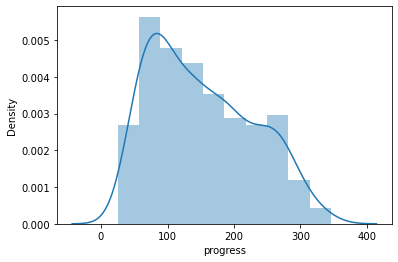

In [17]:
#타겟의 분포 확인 :회귀 모델은 특성과 타겟이 정규분포일때 잘 예측함
import seaborn as sns

sns.distplot(diab_df['progress'])

In [40]:
# X(독립변수), Y(종속변수) 분할
# 방법1
X = diab.data

# 방법2
X = diab_df.drop(['progress'],axis=1).values
y = np.array(diab_df['progress'])
# diab.target
# diab_df.progress.values()

# y = np.array(diab_df['measure'])



In [41]:
# 학습용, 평가용 데이터 분리
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

# 모델별 계수변화, 알파별 계수 비교 데이터프레임(comp_df)

In [42]:
#각 모델별 계수로 이루어진 데이터프레임 준비
comp_df = pd.DataFrame(index=(diab.feature_names) + ['R2 score'])

comp_df

""
age
sex
bmi
bp
s1
s2
s3
s4
s5
s6


In [43]:
#각 모델별, 규제강도별 평가지표 저장


# 1. 규제가 없는 선형모델

In [44]:
# 당뇨병 데이터를 활용하여 규제가 없는 다중선형회귀를 수행하고 결정계수와 bmi 계수를 출력하라

In [45]:
#모델 구축 및 학습 - LinearRegression
model_LR = LinearRegression()
model_LR.fit(X_train,y_train)
#모델 평가
y_pred=model_LR.predict(X_test)
r2 = r2_score(y_test,y_pred)
# 회귀 계수 확인
LR_coef = pd.Series(model_LR.coef_, index=diab.feature_names)
print(r2, LR_coef['bmi'])

0.477292017415733 546.2973726341081


- 계수값 시각화

<BarContainer object of 10 artists>

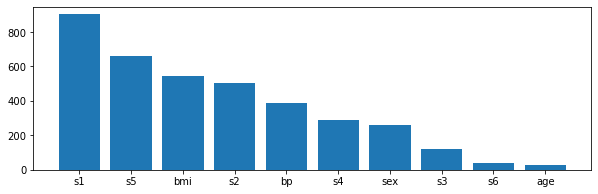

In [46]:
coef = pd.Series(np.abs(model_LR.coef_), index=diab.feature_names).sort_values(ascending=False)
# 시각화
plt.figure(figsize=(10,3))
plt.bar(coef.index, coef.values)

In [47]:
# 모델별 비교 데이터프레임 열 추가
comp_df['LR'] = np.append(model_LR.coef_,r2)
comp_df

,LR
age,29.25035
sex,-261.70768
bmi,546.29737
bp,388.40077
s1,-901.95339
s2,506.76115
s3,121.14846
s4,288.02932
s5,659.27134
s6,41.37537


# 1. 릿지 모델

In [48]:
from sklearn.linear_model import Ridge

# alpha=1인 경우 (default)
model_Ridge1 = Ridge(alpha=1)
model_Ridge1.fit(X_train,y_train)

Ridge(alpha=1)

In [53]:
# 릿지 선형회귀 모델 평가: model_Ridge1, alpha=1
y_pred=model_Ridge1.predict(X_test)
r2=r2_score(y_test,y_pred)
# a=1일때 회귀 계수 확인
coef=pd.Series(model_Ridge1.coef_,index=diab.feature_names)
print('R2:{:.3f} \n'.format(r2))
print(coef)

R2:0.423 

age     45.05377
sex    -71.94755
bmi    280.71588
bp     195.21370
s1      -2.22943
s2     -17.54116
s3    -148.68899
s4     120.46709
s5     198.61486
s6     106.93453
dtype: float64


- 계수값 시각화

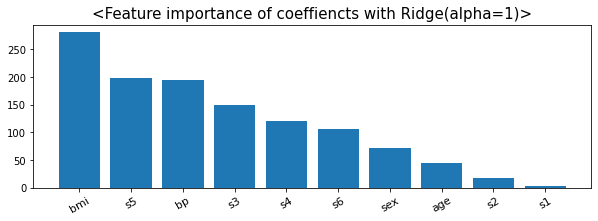

In [54]:
# 시각화
coef = pd.Series(np.abs(model_Ridge1.coef_), index=diab.feature_names).sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 3))
plt.title("<Feature importance of coeffiencts with Ridge(alpha=1)>", fontsize=15)
plt.bar(coef.index, coef.values, align='center' )
plt.xticks(coef.index, rotation=30, fontsize=11)
plt.show()

In [56]:
# alpha_list=[0.01, 1, 10, 100]인 경우
alpha_list=[0.01,1,10,100]

for alpha in alpha_list:
    model_Ridge=Ridge(alpha=alpha)
    model_Ridge.fit(X_train,y_train)
    y_pred=model_Ridge.predict(X_test)
    r2=r2_score(y_test,y_pred)
    
    col_name='Ridge(alpha={:.2f})'.format(alpha)
    comp_df[col_name]=np.append(model_Ridge.coef_,r2)
    
comp_df

,LR,Ridge(alpha=0.01),Ridge(alpha=1.00),Ridge(alpha=10.00),Ridge(alpha=100.00)
age,29.25035,34.16460,45.05377,16.23087,2.07285
sex,-261.70768,-254.04432,-71.94755,-2.96137,-0.00381
bmi,546.29737,550.84240,280.71588,59.52415,6.89991
bp,388.40077,379.13025,195.21370,43.42150,5.08512
s1,-901.95339,-404.24680,-2.22943,13.87507,2.06966
s2,506.76115,123.02427,-17.54116,10.86525,1.74375
s3,121.14846,-99.04672,-148.68899,-37.49585,-4.50888
s4,288.02932,215.02921,120.46709,38.72853,4.90242
s5,659.27134,463.84322,198.61486,49.22477,5.92650
s6,41.37537,50.35055,106.93453,34.73798,4.32870


# 2. 라쏘 모델

In [57]:
from sklearn.linear_model import Lasso

# alpha = 1
model_Lasso1 = Lasso(alpha=1)
model_Lasso1.fit(X_train,y_train)

Lasso(alpha=1)

In [59]:
# 라쏘 선형회귀 모델 평가(alpha=1)
y_pred = model_Lasso1.predict(X_test)
r2=r2_score(y_test,y_pred)

# 선형 모델 평가

#a = 1 라쏘 모델 회귀 계수
coef=pd.Series(model_Lasso1.coef_,index=diab.feature_names)

print('R2 : {:.3f} \n'.format(r2))
print(coef)

R2 : 0.362 

age     0.00000
sex    -0.00000
bmi   443.70216
bp     51.60340
s1      0.00000
s2      0.00000
s3     -0.00000
s4      0.00000
s5    201.96713
s6      0.00000
dtype: float64


- 계수 시각화

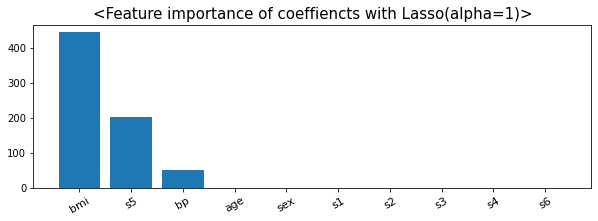

In [61]:
# 시각화
coef = pd.Series(np.abs(model_Lasso1.coef_), index=diab.feature_names).sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 3))
plt.title("<Feature importance of coeffiencts with Lasso(alpha=1)>", fontsize=15)
plt.bar(coef.index, coef.values, align='center' )
plt.xticks(coef.index, rotation=30, fontsize=11)
plt.show()

In [62]:
# alpha_list=[0.01, 1, 10, 100]인 경우

alpha_list=[0.01, 1, 10, 100]
for alpha in alpha_list:
    model_Lasso = Lasso(alpha = alpha)
    model_Lasso.fit(X_train, y_train)
    
    y_pred = model_Lasso.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    col_name = 'Lasso(alpha={:.2f})'.format(alpha)
    comp_df[col_name] = np.append(model_Lasso.coef_, r2)

comp_df

,LR,Ridge(alpha=0.01),Ridge(alpha=1.00),Ridge(alpha=10.00),Ridge(alpha=100.00),Lasso(alpha=0.01),Lasso(alpha=1.00),Lasso(alpha=10.00),Lasso(alpha=100.00)
age,29.25035,34.16460,45.05377,16.23087,2.07285,28.24351,0.00000,0.00000,0.00000
sex,-261.70768,-254.04432,-71.94755,-2.96137,-0.00381,-250.82019,-0.00000,0.00000,0.00000
bmi,546.29737,550.84240,280.71588,59.52415,6.89991,556.21350,443.70216,0.00000,0.00000
bp,388.40077,379.13025,195.21370,43.42150,5.08512,380.66291,51.60340,0.00000,0.00000
s1,-901.95339,-404.24680,-2.22943,13.87507,2.06966,-468.72483,0.00000,0.00000,0.00000
s2,506.76115,123.02427,-17.54116,10.86525,1.74375,166.98261,0.00000,0.00000,0.00000
s3,121.14846,-99.04672,-148.68899,-37.49585,-4.50888,-60.22857,-0.00000,-0.00000,-0.00000
s4,288.02932,215.02921,120.46709,38.72853,4.90242,230.91091,0.00000,0.00000,0.00000
s5,659.27134,463.84322,198.61486,49.22477,5.92650,492.63215,201.96713,0.00000,0.00000
s6,41.37537,50.35055,106.93453,34.73798,4.32870,43.96840,0.00000,0.00000,0.00000


# 3. 엘라스틱넷 모델

In [63]:
from sklearn.linear_model import ElasticNet


# 모델 구축 및 학습(alpha=1, l1_ratio=0.5)
model_ElasticNet1 = ElasticNet(alpha=1, l1_ratio=0.5)
model_ElasticNet1.fit(X_train, y_train)


ElasticNet(alpha=1)

In [64]:
#모델 평가 및 회귀 계수 확인
y_pred = model_ElasticNet1.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 ', r2)

#alpha = 1 엘라스틱넷 모델 회귀 계수
ElasticNet_coef = pd.Series(model_ElasticNet1.coef_, index=diab.feature_names)
ElasticNet_coef


r2  0.003107048190759798


age    0.36757
sex    0.00000
bmi    3.51205
bp     2.32866
s1     0.38019
s2     0.16834
s3    -1.95596
s4     2.22813
s5     2.88743
s6     1.84622
dtype: float64

- 계수 시각화

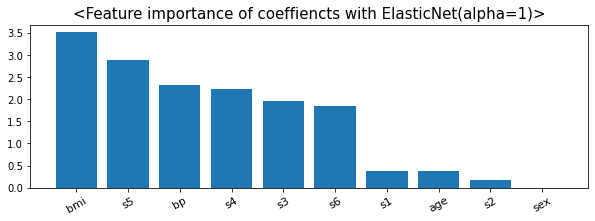

In [65]:
# 시각화
coef = pd.Series(np.abs(model_ElasticNet1.coef_), index=diab.feature_names).sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 3))
plt.title("<Feature importance of coeffiencts with ElasticNet(alpha=1)>", fontsize=15)
plt.bar(coef.index, coef.values, align='center' )
plt.xticks(coef.index, rotation=30, fontsize=11)
plt.show()

In [66]:
# alpha_list=[0.01, 1, 10, 100]인 경우, l1_ratio=0.5 

alpha_list=[0.01, 1, 10, 100]
for alpha in alpha_list:
    model_ElasticNet = ElasticNet(alpha = alpha, l1_ratio=0.5)
    model_ElasticNet.fit(X_train, y_train)
    
    y_pred = model_ElasticNet.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    col_name = 'ElasticNet(alpha={:.2f})'.format(alpha)
    comp_df[col_name] = np.append(model_ElasticNet.coef_, r2)

comp_df


,LR,Ridge(alpha=0.01),Ridge(alpha=1.00),Ridge(alpha=10.00),Ridge(alpha=100.00),Lasso(alpha=0.01),Lasso(alpha=1.00),Lasso(alpha=10.00),Lasso(alpha=100.00),ElasticNet(alpha=0.01),ElasticNet(alpha=1.00),ElasticNet(alpha=10.00),ElasticNet(alpha=100.00)
age,29.25035,34.16460,45.05377,16.23087,2.07285,28.24351,0.00000,0.00000,0.00000,41.41772,0.36757,0.00000,0.00000
sex,-261.70768,-254.04432,-71.94755,-2.96137,-0.00381,-250.82019,-0.00000,0.00000,0.00000,-45.93511,0.00000,0.00000,0.00000
bmi,546.29737,550.84240,280.71588,59.52415,6.89991,556.21350,443.70216,0.00000,0.00000,225.05324,3.51205,0.00000,0.00000
bp,388.40077,379.13025,195.21370,43.42150,5.08512,380.66291,51.60340,0.00000,0.00000,158.16399,2.32866,0.00000,0.00000
s1,-901.95339,-404.24680,-2.22943,13.87507,2.06966,-468.72483,0.00000,0.00000,0.00000,9.02097,0.38019,0.00000,0.00000
s2,506.76115,123.02427,-17.54116,10.86525,1.74375,166.98261,0.00000,0.00000,0.00000,-1.76225,0.16834,0.00000,0.00000
s3,121.14846,-99.04672,-148.68899,-37.49585,-4.50888,-60.22857,-0.00000,-0.00000,-0.00000,-124.24009,-1.95596,-0.00000,-0.00000
s4,288.02932,215.02921,120.46709,38.72853,4.90242,230.91091,0.00000,0.00000,0.00000,106.91002,2.22813,0.00000,0.00000
s5,659.27134,463.84322,198.61486,49.22477,5.92650,492.63215,201.96713,0.00000,0.00000,165.00639,2.88743,0.00000,0.00000
s6,41.37537,50.35055,106.93453,34.73798,4.32870,43.96840,0.00000,0.00000,0.00000,97.21337,1.84622,0.00000,0.00000


In [67]:
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, age to R2 score
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LR                        11 non-null     float64
 1   Ridge(alpha=0.01)         11 non-null     float64
 2   Ridge(alpha=1.00)         11 non-null     float64
 3   Ridge(alpha=10.00)        11 non-null     float64
 4   Ridge(alpha=100.00)       11 non-null     float64
 5   Lasso(alpha=0.01)         11 non-null     float64
 6   Lasso(alpha=1.00)         11 non-null     float64
 7   Lasso(alpha=10.00)        11 non-null     float64
 8   Lasso(alpha=100.00)       11 non-null     float64
 9   ElasticNet(alpha=0.01)    11 non-null     float64
 10  ElasticNet(alpha=1.00)    11 non-null     float64
 11  ElasticNet(alpha=10.00)   11 non-null     float64
 12  ElasticNet(alpha=100.00)  11 non-null     float64
dtypes: float64(13)
memory usage: 1.2+ KB


### LassoCV() : k-폴드 교차 검증으로 최적의 Lasso 모델 하이퍼파라미터 alpha 찾기

In [68]:
#alpha_list=[0.01, 1, 10, 100]
alpha_list = np.arange(0.01, 10, 0.01)
cv=5
max_iter = 5000

In [69]:
from sklearn.linear_model import LassoCV

#LassoCV()에 필요한 매개변수 설정
model_LassoCV = LassoCV(alphas=alpha_list, cv=cv, max_iter = max_iter, n_jobs=-1, random_state=42)
# n_jobs=-1 : 최대 코어수를 다 씀

- 모델 학습

In [71]:
model_LassoCV.fit(X_train,y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67...
       9.36, 9.37, 9.38, 9.39, 9.4 , 9.41, 9.42, 9.43, 9.44, 9.45, 9.46,
       9.47, 9.48, 9.49, 9.5 , 9.51, 9.52, 9.53, 9.54, 9.55, 9.56, 9.57,
       9.58, 9.59, 9.6 , 9.61, 9.62, 9.63, 9.64, 9.65, 9.66, 9.67, 9.68,
       9.69, 9.7 , 9.71, 9.72, 9.73, 9.74, 9.75, 9.76, 9.77, 9.78, 9.79,
       9.8 , 9.81, 9.82, 9.83, 9.84, 9.85, 9.86, 9.87, 9.88, 9.89, 9.9 ,
       9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99]),
        cv=5, max_iter=5000, n_jobs=-1, random_state=42)

In [72]:
model_LassoCV.alpha_

0.01

In [73]:
y_pred = model_LassoCV.predict(X_test)

In [74]:
r2_score(y_test,y_pred)

0.4787160211806071

# [응용] 보스턴 주택가격 데이터를 활용하여, 규제가 없을때, 리지, 라쏘, 엘라스틱넷 선형회귀를 수행하고 각각의 회귀계수 및  예측 성능을 비교하라
- 테스트 사이즈:0.3
- random_state=42

In [75]:
from sklearn.datasets import load_boston

boston = load_boston()

X = boston.data
y = boston.target

In [76]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [77]:
# train, test 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
# 다중회귀, 리지회귀, 라쏘 회귀, 엘라스틱넷 회귀 수행

In [79]:
from sklearn.linear_model import LinearRegression

def get_r2_coef(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    print('model; ', model)
    print('r2: ', r2)
    print()
    
    coef = pd.Series(model.coef_, index=boston.feature_names)
    print(coef)
    print('-'*50)
    return


In [80]:
# 다중회귀

LR = LinearRegression()
get_r2_coef(LR, X_train, y_train, X_test, y_test)

model;  LinearRegression()
r2:  0.7112260057484887

CRIM       -0.13347
ZN          0.03581
INDUS       0.04952
CHAS        3.11984
NOX       -15.41706
RM          4.05720
AGE        -0.01082
DIS        -1.38600
RAD         0.24273
TAX        -0.00870
PTRATIO    -0.91069
B           0.01179
LSTAT      -0.54711
dtype: float64
--------------------------------------------------


In [81]:
# 리지 회귀

alpha_list=[0.01, 1, 10, 100]

for alpha in alpha_list:
    model_Ridge = Ridge(alpha=alpha)
    get_r2_coef(model_Ridge, X_train, y_train, X_test, y_test)

model;  Ridge(alpha=0.01)
r2:  0.7111351633163315

CRIM       -0.13337
ZN          0.03583
INDUS       0.04891
CHAS        3.11732
NOX       -15.27000
RM          4.05768
AGE        -0.01095
DIS        -1.38377
RAD         0.24237
TAX        -0.00871
PTRATIO    -0.90904
B           0.01180
LSTAT      -0.54740
dtype: float64
--------------------------------------------------
model;  Ridge(alpha=1)
r2:  0.7041586727559441

CRIM      -0.12843
ZN         0.03695
INDUS      0.01791
CHAS       2.93269
NOX       -7.84806
RM         4.06357
AGE       -0.01724
DIS       -1.27176
RAD        0.22549
TAX       -0.00938
PTRATIO   -0.82710
B          0.01199
LSTAT     -0.56347
dtype: float64
--------------------------------------------------
model;  Ridge(alpha=10)
r2:  0.6954181695183631

CRIM      -0.12655
ZN         0.03950
INDUS     -0.00876
CHAS       2.10758
NOX       -1.43399
RM         3.78285
AGE       -0.01985
DIS       -1.17825
RAD        0.22528
TAX       -0.01046
PTRATIO   -0.77353
B   

In [82]:
# 라쏘 회귀
alpha_list=[0.01, 1, 10, 100]

for alpha in alpha_list:
    model_Lasso = Lasso(alpha=alpha)
    get_r2_coef(model_Lasso, X_train, y_train, X_test, y_test)

model;  Lasso(alpha=0.01)
r2:  0.708826451969222

CRIM       -0.13100
ZN          0.03626
INDUS       0.03471
CHAS        2.94331
NOX       -11.90127
RM          4.05058
AGE        -0.01345
DIS        -1.32916
RAD         0.23458
TAX        -0.00900
PTRATIO    -0.87148
B           0.01190
LSTAT      -0.55591
dtype: float64
--------------------------------------------------
model;  Lasso(alpha=1)
r2:  0.6559060829154337

CRIM      -0.09192
ZN         0.03467
INDUS     -0.00000
CHAS       0.00000
NOX       -0.00000
RM         1.28132
AGE        0.01144
DIS       -0.61602
RAD        0.19150
TAX       -0.00954
PTRATIO   -0.70335
B          0.01083
LSTAT     -0.77992
dtype: float64
--------------------------------------------------
model;  Lasso(alpha=10)
r2:  0.5030666675993392

CRIM      -0.00000
ZN         0.01406
INDUS     -0.00000
CHAS       0.00000
NOX        0.00000
RM         0.00000
AGE        0.00000
DIS       -0.00000
RAD        0.00000
TAX       -0.00834
PTRATIO   -0.00000
B    

In [83]:
# 엘라스틱넷 회귀
alpha_list=[0.01, 1, 10, 100]
l1_ratio= [ 0.1, 0.3, 0.6, 0.9]
for alpha in alpha_list:
    for l1 in l1_ratio:
        model_ElasticNet = ElasticNet(alpha=alpha, l1_ratio=l1)
        get_r2_coef(model_ElasticNet, X_train, y_train, X_test, y_test)

model;  ElasticNet(alpha=0.01, l1_ratio=0.1)
r2:  0.6985088203463852

CRIM      -0.12626
ZN         0.03795
INDUS      0.00077
CHAS       2.64746
NOX       -3.69049
RM         4.00395
AGE       -0.02010
DIS       -1.20996
RAD        0.21950
TAX       -0.00988
PTRATIO   -0.78528
B          0.01211
LSTAT     -0.57795
dtype: float64
--------------------------------------------------
model;  ElasticNet(alpha=0.01, l1_ratio=0.3)
r2:  0.6992945156236627

CRIM      -0.12640
ZN         0.03773
INDUS      0.00293
CHAS       2.69748
NOX       -4.22976
RM         4.02145
AGE       -0.01977
DIS       -1.21695
RAD        0.21960
TAX       -0.00979
PTRATIO   -0.78985
B          0.01209
LSTAT     -0.57531
dtype: float64
--------------------------------------------------
model;  ElasticNet(alpha=0.01, l1_ratio=0.6)
r2:  0.701311989607996

CRIM      -0.12702
ZN         0.03733
INDUS      0.00859
CHAS       2.78247
NOX       -5.62182
RM         4.04472
AGE       -0.01876
DIS       -1.23622
RAD        0.

In [84]:
# GridSearchCV

from sklearn.model_selection import GridSearchCV

params = {
    'alpha':[0.01, 1, 10, 100],
    'l1_ratio':[ 0.1, 0.3, 0.6, 0.9]
}

model_ElasticNet = ElasticNet()
grid_reg = GridSearchCV(model_ElasticNet, param_grid=params, cv=3)

grid_reg.fit(X_train, y_train)
y_pred = grid_reg.predict(X_test)
r2_score(y_test ,y_pred)

grid_reg.best_params_

grid_reg.best_score_

grid_reg.cv_results_

{'mean_fit_time': array([1.44497554e-03, 6.66618347e-04, 6.84897105e-04, 9.98258591e-04,
        8.06331635e-04, 3.33468119e-04, 6.68207804e-04, 1.00223223e-03,
        1.03831291e-03, 7.21931458e-04, 1.77621841e-04, 4.97500102e-05,
        8.11974208e-04, 8.11258952e-04, 9.54945882e-04, 6.33637110e-04]),
 'std_fit_time': array([4.15797141e-04, 4.71370394e-04, 4.84803582e-04, 1.52040533e-06,
        1.50523652e-04, 4.71595137e-04, 4.72495713e-04, 4.89903609e-07,
        1.76692779e-04, 5.14932508e-04, 2.51195217e-04, 7.03571391e-05,
        2.04669108e-04, 2.65132418e-04, 6.26048430e-05, 4.49629726e-04]),
 'mean_score_time': array([0.0005912 , 0.00033259, 0.0003678 , 0.        , 0.00040436,
        0.0003322 , 0.00033474, 0.        , 0.00033442, 0.00033498,
        0.        , 0.        , 0.00063388, 0.0001893 , 0.00033704,
        0.00033212]),
 'std_score_time': array([0.00051043, 0.00047036, 0.00044533, 0.        , 0.00042945,
        0.0004698 , 0.00047339, 0.        , 0.00047294, 